# Approach 2
2) we get the top 10 trackers, then track their counts throughout the popularity (x axis = popularity, y axis = count for top# tracker, 10 graphs total)

analytics.js

conversion_async.js

advert.gif

tag.js

ga.js

watch.js

shopify-boomerang-1.0.0.min.js

insight.min.js

bat.js

e-202040.js

In [6]:
# Constants used in the program:
# URL_DATA_FOLDER is where all the data  is saved.
URL_DATA_FOLDER = "../../popularity_01182021/"

# ALEXA TOP 1M file
ALEXA_TOP_1M_FILEPATH = "../../popularity_01182021/alexa-top1m-2020-09-03_0900_UTC.csv"

# CDF_FILE_OUTPUT is where the CDF graph will be outputted to
TOP_10_TRACKERS_PATH = "./top_10_trackers.pdf"

In [7]:
top_10_trackers = ["analytics.js", "conversion_async.js", "advert.gif", "tag.js", 
                   "ga.js", "watch.js", "shopify-boomerang-1.0.0.min.js", "insight.min.js", 
                   "bat.js", "e-202040.js"]
top_10_trackers = ["analytics.js", "conversion_async.js", "advert.gif", "tag.js", 
                   "ga.js", "watch.js", "shopify-boomerang-1.0.0.min.js", "insight.min.js", 
                   "bat.js", "e-202040.js"]

In [8]:
import json 
import os

In [9]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [10]:
# Alexa top 1m sorted by popularity
popularity_list = []
with open(ALEXA_TOP_1M_FILEPATH, 'r') as f:
    lines = f.read().splitlines()
    for line in lines:
        popularity_list.append(line.split(",")[1])

In [11]:
# From output:
# website_url + "$$" + json.dumps(tracker_urls) + "$$" + json.dumps(ads_urls) + "$$" + json.dumps(other_urls)
websites = {}
for root, dirs, files in os.walk(URL_DATA_FOLDER, topdown=False):
    for name in files:
        # goes through the data generated from the branch-analysis script
        if('urls' in name):
            filePath = os.path.join(root, name)
            print(filePath)
            with open(filePath, 'r') as f:
                lines = f.read().splitlines()
                for line in lines:
                    fields = line.split("$${")
                    url = fields[0]
#                     print(url)
                    trackers = json.loads("{" + fields[1])
                    ads = json.loads("{" + fields[2])
                    others = json.loads("{" + fields[3])
                    websites[url] = {}
                    websites[url]["trackers"] = trackers
                    websites[url]["ads"] = ads
                    websites[url]["others"] = others
                    

../../popularity_01182021/13\output\urls_0.txt
../../popularity_01182021/13\output\urls_1.txt
../../popularity_01182021/13\output\urls_2.txt
../../popularity_01182021/13\output\urls_3.txt
../../popularity_01182021/13\output\urls_4.txt
../../popularity_01182021/13\output\urls_5.txt
../../popularity_01182021/13\output\urls_6.txt
../../popularity_01182021/13\output\urls_7.txt
../../popularity_01182021/14\output\urls_0.txt
../../popularity_01182021/14\output\urls_1.txt
../../popularity_01182021/14\output\urls_2.txt
../../popularity_01182021/14\output\urls_3.txt
../../popularity_01182021/14\output\urls_4.txt
../../popularity_01182021/14\output\urls_5.txt
../../popularity_01182021/14\output\urls_6.txt
../../popularity_01182021/14\output\urls_7.txt
../../popularity_01182021/15\output\urls_0.txt
../../popularity_01182021/15\output\urls_1.txt
../../popularity_01182021/15\output\urls_2.txt
../../popularity_01182021/15\output\urls_3.txt
../../popularity_01182021/15\output\urls_4.txt
../../popular

In [12]:
# Aggregate trackers and ads by truncation
popular_trackers = {}
popular_ads = {}
for website in popularity_list:
    if website in websites:
        for tracker in websites[website]["trackers"]:
            old_tracker = tracker
            tracker = tracker.split("?")[0]
            if tracker not in popular_trackers:
                popular_trackers[tracker] = {}
                popular_trackers[tracker]["count"] = 1
                popular_trackers[tracker]["bytes"] = websites[website]["trackers"][old_tracker]["total_bytes"]
            else:
                popular_trackers[tracker]["count"] += 1
                popular_trackers[tracker]["bytes"] += websites[website]["trackers"][old_tracker]["total_bytes"]
        for ad in websites[website]["ads"]:
            old_ad = ad
            ad = ad.split("?")[0]
            if ad not in popular_ads:
                popular_ads[ad] = {}
                popular_ads[ad]["count"] = 1
                popular_ads[ad]["bytes"] = websites[website]["ads"][old_ad]["total_bytes"]
            else:
                popular_ads[ad]["count"] += 1
                popular_ads[ad]["bytes"] += websites[website]["ads"][old_ad]["total_bytes"]


In [13]:
for ad in popular_ads:
    if popular_ads[ad]["count"] >= 10000:
        print(ad)
print("====================================================")
for tracker in popular_trackers:
    if popular_trackers[tracker]["count"] >= 10000:
        print(tracker)

https://securepubads.g.doubleclick.net/gampad/ads
https://tpc.googlesyndication.com/safeframe/1-0-37/html/container.html
https://securepubads.g.doubleclick.net/tag/js/gpt.js
https://securepubads.g.doubleclick.net/gpt/pubads_impl_2020092201.js
https://securepubads.g.doubleclick.net/pcs/view
https://pagead2.googlesyndication.com/getconfig/sodar
https://tpc.googlesyndication.com/sodar/sodar2.js
https://tpc.googlesyndication.com/sodar/sodar2/216/runner.html
https://securepubads.g.doubleclick.net/pagead/adview
https://tpc.googlesyndication.com/sodar/sodar2/217/runner.html
https://pagead2.googlesyndication.com/pagead/js/r20200923/r20190131/show_ads_impl_fy2019.js
https://googleads.g.doubleclick.net/pagead/html/r20200923/r20190131/zrt_lookup.html
https://googleads.g.doubleclick.net/pagead/ads
https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js
https://pagead2.googlesyndication.com/pagead/gen_204
https://www.googleadservices.com/pagead/conversion.js
https://pagead2.googlesyndication

From the popularity_graphs_approach1 notebook

# Two ways I think I can approach this
## 1) we graph popularity on the bottom, then numbers of ads/trackers as y axis
## 2) we get the top 10 trackers, then track their counts throughout the popularity (x axis = popularity, y axis = count for top# tracker, 10 graphs total)

# Approach 2

In [14]:
# Approach 2
count_trackers_list = [] # [   [count for top 10k with 1st tracker, top 20k...]        [1,5,6030,202,32]  []
popular_tracker_pos = 0
for popular_tracker in top_10_trackers:
    website_count = 0
    bucket_count = 0
    count_trackers_list.append(list())
    for website in popularity_list:
        if(website_count == 0):
            website_count += 1
            continue
        if website in websites:
            for tracker in websites[website]["trackers"]:
                if popular_tracker in tracker:
                    if bucket_count >= len(count_trackers_list[popular_tracker_pos]):
                        count_trackers_list[popular_tracker_pos].append(0)
                    count_trackers_list[popular_tracker_pos][bucket_count] += 1
            
            if website_count % 10000 == 0:
                bucket_count += 1
            website_count += 1
    popular_tracker_pos += 1

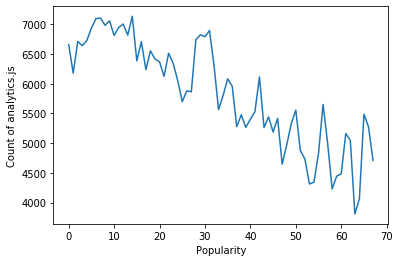

In [15]:
# from matplotlib import rcParams
fig, ax = plt.subplots()

x = list(range(0,len(count_trackers_list[0]), 1))
plt.plot(x, count_trackers_list[0])

plt.ylabel("Count of " + top_10_trackers[0])
plt.xlabel("Popularity")

plt.show()

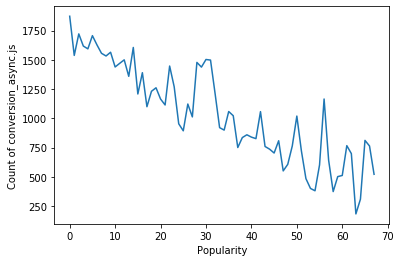

In [16]:
# from matplotlib import rcParams
fig, ax = plt.subplots()

x = list(range(0,len(count_trackers_list[1]), 1))
plt.plot(x, count_trackers_list[1])

plt.ylabel("Count of " + top_10_trackers[1])
plt.xlabel("Popularity")
plt.show()

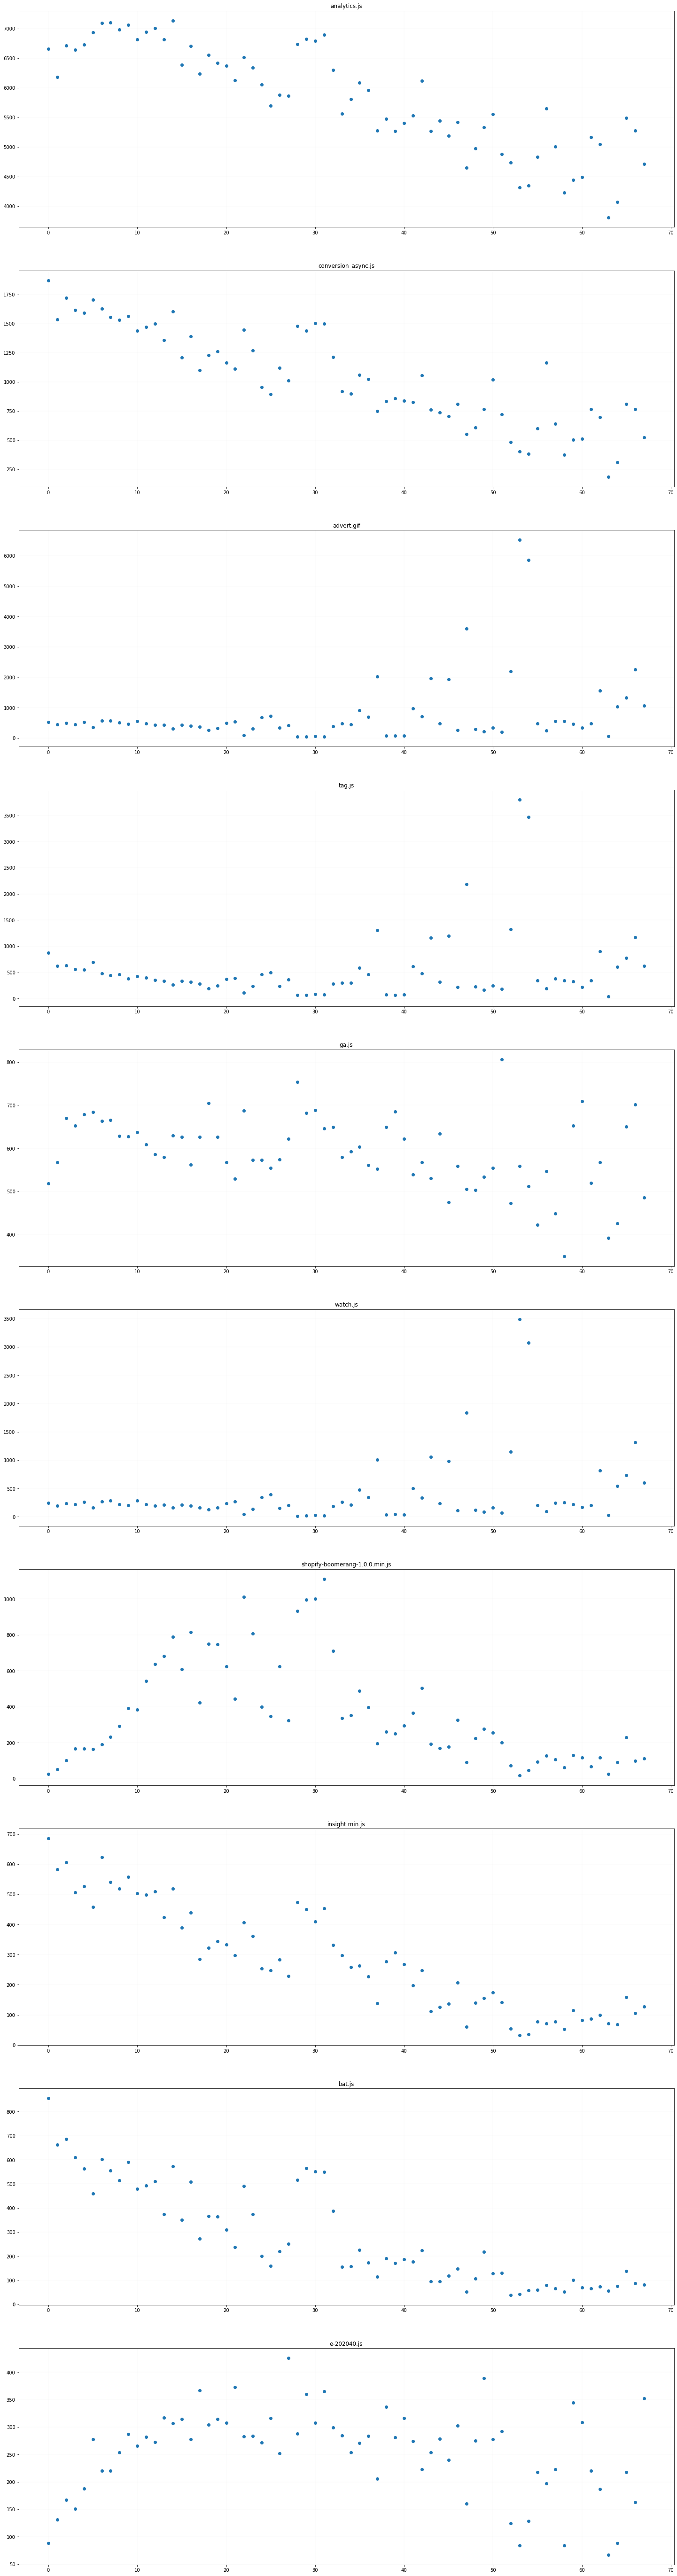

In [17]:
fig, axs = plt.subplots(10, 1, figsize=(25,100))

for count in range(0,10):
    x = list(range(0,len(count_trackers_list[count]), 1))
    
    axs[count].plot(x, count_trackers_list[count], 'o')
    axs[count].set_title(top_10_trackers[count])

    # adds a gray grid for readability
    axs[count].set_axisbelow(True)
    axs[count].grid(color='#888888', linestyle=':', linewidth=0.1)

plt.savefig(TOP_10_TRACKERS_PATH, format='pdf')
plt.show()

In [18]:
count_trackers_list

[[6657,
  6178,
  6710,
  6640,
  6726,
  6932,
  7094,
  7103,
  6982,
  7057,
  6812,
  6944,
  7003,
  6816,
  7134,
  6384,
  6706,
  6236,
  6553,
  6414,
  6369,
  6124,
  6513,
  6341,
  6055,
  5697,
  5879,
  5864,
  6739,
  6823,
  6789,
  6894,
  6302,
  5563,
  5803,
  6082,
  5956,
  5276,
  5477,
  5267,
  5402,
  5527,
  6114,
  5263,
  5442,
  5187,
  5417,
  4647,
  4972,
  5328,
  5556,
  4875,
  4733,
  4313,
  4344,
  4828,
  5651,
  5004,
  4230,
  4444,
  4485,
  5162,
  5045,
  3810,
  4065,
  5486,
  5276,
  4709],
 [1873,
  1538,
  1722,
  1618,
  1594,
  1707,
  1628,
  1556,
  1533,
  1565,
  1439,
  1470,
  1500,
  1359,
  1606,
  1208,
  1390,
  1099,
  1231,
  1261,
  1165,
  1114,
  1447,
  1270,
  953,
  893,
  1122,
  1012,
  1478,
  1438,
  1503,
  1498,
  1213,
  920,
  899,
  1058,
  1022,
  750,
  835,
  859,
  839,
  826,
  1057,
  759,
  736,
  703,
  808,
  550,
  606,
  764,
  1019,
  722,
  484,
  400,
  380,
  601,
  1165,
  641,
  373,
  501,

In [19]:
total_trackers = 0
total_popular_trackers = 0

for website in popularity_list:
    if website in websites:
        for tracker in websites[website]["trackers"]:
            old_tracker = tracker
            tracker = tracker.split("?")[0]
            total_trackers += 1
for popular_tracker in count_trackers_list:
    for count in popular_tracker:
        total_popular_trackers += count
        


In [20]:
total_trackers

2911461

In [21]:
total_popular_trackers

705762

In [22]:
total_popular_trackers / total_trackers

0.24240819300000926